# Exploring Hong Kong Neighborhoods


### 1. Backgroud and Problem

Hong Kong, located on China's southern coast, Hong Kong is a unique place where East meets West and old meets new. A former British colony and current Special Administrative Region of China, Hong Kong is home to an exceptional culture. Having inherited ancient Chinese heritage and experienced a period of Western, colonial influence, Hong Kong is a multifaceted city where English and Cantonese, “Feng Shui” and football, towering skyscrapers and historical sites exist side by side.

Hong Kong is definitely one of the best places to start up a new business. Food is the most impportant part in people's daily life. Let's see how to start the battle of neighborhoods in Hong Kong.



**Target Audience**

- Business personnel who wants to invest or open a restaurant. This analysis will be a comprehensive guide to start or expand restaurants targeting the large pool of office workers in Tokyo during lunch hours.
- Freelancer who loves to have their own restaurant as a side business. This analysis will give an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.
- New graduates, to find reasonable lunch/breakfast place close to office.


### 2. Data Preparation

Data used in the analysis are listed below:

- Districts of Hong_Kong -- Wikipedia Page. 
- Using Geopy to get geological location by address name
- Using Foursquare API to get the most common venues of given district of Hong Kong




### 3. Methodology

- Firstly, I used BeautifulSoup to scrape boroughs from Wikipedia and organize a table containing of Districts of Hong Kong.

- Secondly, I used Geopy to get the geological location of each community board. 

- Next, I utilized the Foursquare API to explore the boroughs and segment them. I designed the limit as 100 venues and the radius 500 meters for each borough from their given latitude and longitude information. 

- Finally, I used Kmean to cluster the similar district and analysis the result 

In [182]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

> **Scrape the Wikipedia page to obtain the data**

In [99]:
# create table on Wikipedia page
req = requests.get("https://en.wikipedia.org/wiki/Districts_of_Hong_Kong")
soup = BeautifulSoup(req.content, 'lxml')
table = soup.find_all('table')[5] #table 
df = pd.read_html(str(table)) # use pd.read_html on the url
df = pd.DataFrame(df[0]) 

# preprocessing 
df.columns=['District', 'Chinese', 'Population', 'Area', 'Density', 'Region']
df['Neighborhood'] = df[['District', 'Region']].apply(lambda x: ', '.join(x), axis=1)
df.loc[11, 'Neighborhood'] = 'North District, New Territories'
df

,District,Chinese,Population,Area,Density,Region,Neighborhood
0,Central and Western,中西區,244600,12.44,19983.92,Hong Kong Island,"Central and Western, Hong Kong Island"
1,Eastern,東區,574500,18.56,31217.67,Hong Kong Island,"Eastern, Hong Kong Island"
2,Southern,南區,269200,38.85,6962.68,Hong Kong Island,"Southern, Hong Kong Island"
3,Wan Chai,灣仔區,150900,9.83,15300.10,Hong Kong Island,"Wan Chai, Hong Kong Island"
4,Sham Shui Po,深水埗區,390600,9.35,41529.41,Kowloon,"Sham Shui Po, Kowloon"
5,Kowloon City,九龍城區,405400,10.02,40194.70,Kowloon,"Kowloon City, Kowloon"
6,Kwun Tong,觀塘區,641100,11.27,56779.05,Kowloon,"Kwun Tong, Kowloon"
7,Wong Tai Sin,黃大仙區,426200,9.30,45645.16,Kowloon,"Wong Tai Sin, Kowloon"
8,Yau Tsim Mong,油尖旺區,318100,6.99,44864.09,Kowloon,"Yau Tsim Mong, Kowloon"
9,Islands,離島區,146900,175.12,825.14,New Territories,"Islands, New Territories"


> **Get the latitude and the longitude coordinates of each district**

In [100]:
from geopy.geocoders import Nominatim # convert address into latitue and longitude

geolocator = Nominatim(user_agent='hk_explorer')
df['Latitude']=df['Neighborhood'].apply(geolocator.geocode).apply(lambda x: x.latitude)
df['Longitude']=df['Neighborhood'].apply(geolocator.geocode).apply(lambda x: x.longitude)

In [101]:
df

,District,Chinese,Population,Area,Density,Region,Neighborhood,Latitude,Longitude
0,Central and Western,中西區,244600,12.44,19983.92,Hong Kong Island,"Central and Western, Hong Kong Island",22.281824,114.157863
1,Eastern,東區,574500,18.56,31217.67,Hong Kong Island,"Eastern, Hong Kong Island",22.273078,114.233594
2,Southern,南區,269200,38.85,6962.68,Hong Kong Island,"Southern, Hong Kong Island",22.244541,114.205376
3,Wan Chai,灣仔區,150900,9.83,15300.10,Hong Kong Island,"Wan Chai, Hong Kong Island",22.279015,114.172483
4,Sham Shui Po,深水埗區,390600,9.35,41529.41,Kowloon,"Sham Shui Po, Kowloon",22.328190,114.160854
5,Kowloon City,九龍城區,405400,10.02,40194.70,Kowloon,"Kowloon City, Kowloon",22.330160,114.189937
6,Kwun Tong,觀塘區,641100,11.27,56779.05,Kowloon,"Kwun Tong, Kowloon",22.312937,114.225610
7,Wong Tai Sin,黃大仙區,426200,9.30,45645.16,Kowloon,"Wong Tai Sin, Kowloon",22.341654,114.193859
8,Yau Tsim Mong,油尖旺區,318100,6.99,44864.09,Kowloon,"Yau Tsim Mong, Kowloon",22.302857,114.182032
9,Islands,離島區,146900,175.12,825.14,New Territories,"Islands, New Territories",22.230076,113.986785


In [102]:
# Use geopy library to get the latitude and longitude values of Hong Kong

address = 'Hong Kong'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Hong Kong are {}, {}'.format(latitude,longitude))


C:\Users\yiqlin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


The geograpical coordinate of Hong Kong are 22.2793278, 114.1628131


> ### Visualization and Data Exploration

In [103]:
import folium # map rendering library

# Create a map of Toronto with neighborhoods superimposed on top
map_hk = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, district, region in zip(df['Latitude'],df['Longitude'],df['District'],df['Region']):
    label = '{}, {}'.format(district, region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup=label,
        color = 'blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hk)

map_hk

> **Using Foursquare Location Data**

In [104]:
# Define Foursquare Credentials and Version

CLIENT_ID = '4GU4VNIF5ZQZIBQRXAQHH110V2VOU13Z2MV1IISNHJAPRLZY' # your Foursquare ID
CLIENT_SECRET = '3TAQUDG2HQM1B2R4LYVR0YIR0NN15NYJWENUK20UKQMMOWKE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4GU4VNIF5ZQZIBQRXAQHH110V2VOU13Z2MV1IISNHJAPRLZY
CLIENT_SECRET:3TAQUDG2HQM1B2R4LYVR0YIR0NN15NYJWENUK20UKQMMOWKE


In [105]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [106]:
# use above function on each neighborhood and create a new dataframe 

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

hk_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Central and Western, Hong Kong Island
Eastern, Hong Kong Island
Southern, Hong Kong Island
Wan Chai, Hong Kong Island
Sham Shui Po, Kowloon
Kowloon City, Kowloon
Kwun Tong, Kowloon
Wong Tai Sin, Kowloon
Yau Tsim Mong, Kowloon
Islands, New Territories
Kwai Tsing, New Territories
North District, New Territories
Sai Kung, New Territories
Sha Tin, New Territories
Tai Po, New Territories
Tsuen Wan, New Territories
Tuen Mun, New Territories
Yuen Long, New Territories


In [107]:
# Let's check the size of the resulting dataframe
print(hk_venues.shape)
hk_venues.head()

(645, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Central and Western, Hong Kong Island",22.281824,114.157863,Mandarin Grill + Bar (文華扒房＋酒吧),22.281928,114.159408,Steakhouse
1,"Central and Western, Hong Kong Island",22.281824,114.157863,Mandarin Oriental Hong Kong (香港文華東方酒店),22.281857,114.159382,Hotel
2,"Central and Western, Hong Kong Island",22.281824,114.157863,Mott 32 (卅二公館),22.280286,114.159080,Dim Sum Restaurant
3,"Central and Western, Hong Kong Island",22.281824,114.157863,XYZ,22.280877,114.157108,Cycle Studio
4,"Central and Western, Hong Kong Island",22.281824,114.157863,The Mandarin Cake Shop,22.281959,114.159416,Bakery


In [173]:
# Let's check how many venues were returned for each neighborhood
hk_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Central and Western, Hong Kong Island",100,100,100,100,100,100
"Eastern, Hong Kong Island",2,2,2,2,2,2
"Islands, New Territories",2,2,2,2,2,2
"Kowloon City, Kowloon",70,70,70,70,70,70
"Kwai Tsing, New Territories",3,3,3,3,3,3
"Kwun Tong, Kowloon",67,67,67,67,67,67
"Sai Kung, New Territories",54,54,54,54,54,54
"Sha Tin, New Territories",57,57,57,57,57,57
"Sham Shui Po, Kowloon",30,30,30,30,30,30


In [127]:
print('There are {} uniques categories.'.format(len(hk_venues['Venue Category'].unique())))

There are 143 uniques categories.


In [190]:
# top 10 most popular venue category
top10 = hk_venues.groupby('Venue Category').count().sort_values('Neighborhood', ascending=False)['Neighborhood'].head(10).to_frame().reset_index()
top10

,Venue Category,Neighborhood
0,Chinese Restaurant,42
1,Coffee Shop,38
2,Café,38
3,Dessert Shop,26
4,Noodle House,26
5,Thai Restaurant,21
6,Shopping Mall,20
7,Fast Food Restaurant,20
8,Japanese Restaurant,18
9,Italian Restaurant,17


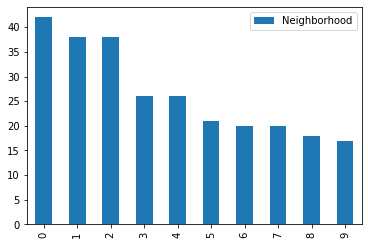

In [195]:
top10.plot(kind='bar', rot=90)

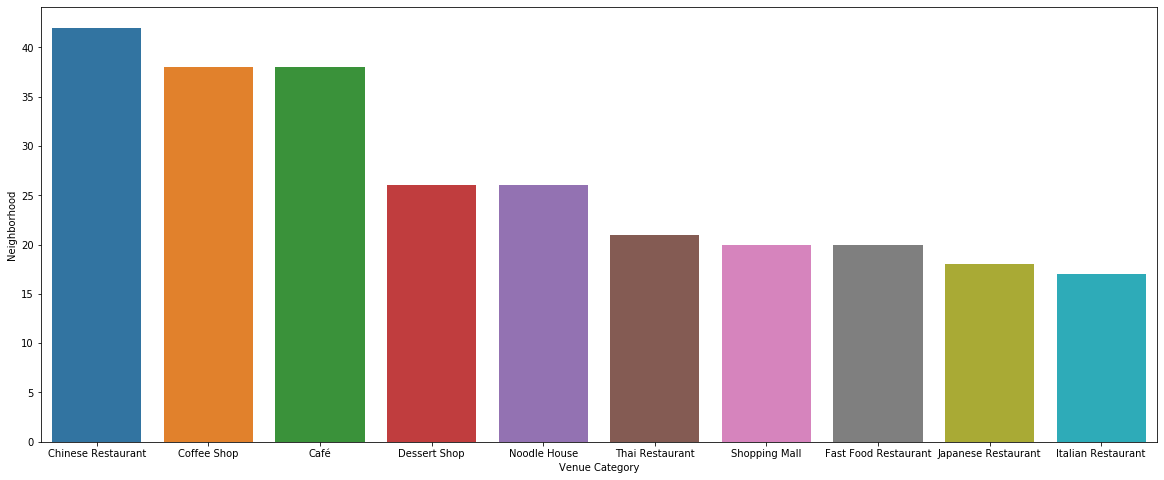

In [207]:
plt.figure(figsize=(20,8))
sns.barplot(x=top10['Venue Category'], y=top10['Neighborhood'])

> **Analyze Each Neighborhood**

In [110]:
# one hot encoding 
hk_onehot = pd.get_dummies(hk_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hk_onehot['Neighborhood'] = hk_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [hk_onehot.columns[-1]] + list(hk_onehot.columns[:-1])
hk_onehot = hk_onehot[fixed_columns]

In [112]:
print(hk_onehot.shape)
hk_onehot.head()

(645, 144)


,Neighborhood,Airport Service,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Astrologer,Athletics & Sports,BBQ Joint,Bakery,...,Toy / Game Store,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio,Yunnan Restaurant,Zoo
0,"Central and Western, Hong Kong Island",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Central and Western, Hong Kong Island",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Central and Western, Hong Kong Island",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Central and Western, Hong Kong Island",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Central and Western, Hong Kong Island",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
hk_grouped = hk_onehot.groupby('Neighborhood').mean().reset_index()
hk_grouped

,Neighborhood,Airport Service,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Astrologer,Athletics & Sports,BBQ Joint,Bakery,...,Toy / Game Store,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio,Yunnan Restaurant,Zoo
0,"Central and Western, Hong Kong Island",0.01,0.000000,0.010000,0.01,0.010000,0.000000,0.000000,0.020000,0.020000,...,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000
1,"Eastern, Hong Kong Island",0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Islands, New Territories",0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Kowloon City, Kowloon",0.00,0.000000,0.000000,0.00,0.028571,0.000000,0.000000,0.000000,0.028571,...,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Kwai Tsing, New Territories",0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Kwun Tong, Kowloon",0.00,0.000000,0.014925,0.00,0.014925,0.000000,0.014925,0.014925,0.014925,...,0.000000,0.000000,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Sai Kung, New Territories",0.00,0.018519,0.000000,0.00,0.000000,0.000000,0.000000,0.018519,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.018519,0.000000,0.000000,0.000000
7,"Sha Tin, New Territories",0.00,0.000000,0.000000,0.00,0.017544,0.000000,0.017544,0.000000,0.000000,...,0.017544,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000
8,"Sham Shui Po, Kowloon",0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Southern, Hong Kong Island",0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [114]:
# Print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in hk_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = hk_grouped[hk_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central and Western, Hong Kong Island----
                 venue  freq
0                  Bar  0.06
1  Japanese Restaurant  0.05
2                Hotel  0.05
3         Cocktail Bar  0.04
4          Coffee Shop  0.04


----Eastern, Hong Kong Island----
                           venue  freq
0                       Bus Stop   0.5
1                  Historic Site   0.5
2                Organic Grocery   0.0
3           Pakistani Restaurant   0.0
4  Paper / Office Supplies Store   0.0


----Islands, New Territories----
                           venue  freq
0             Rock Climbing Spot   0.5
1                       Mountain   0.5
2                Organic Grocery   0.0
3           Pakistani Restaurant   0.0
4  Paper / Office Supplies Store   0.0


----Kowloon City, Kowloon----
                venue  freq
0     Thai Restaurant  0.20
1        Dessert Shop  0.14
2  Chinese Restaurant  0.07
3                Café  0.07
4         Coffee Shop  0.06


----Kwai Tsing, New Territories----
   

In [115]:
# a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [116]:

# create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hk_grouped['Neighborhood']

for ind in np.arange(hk_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hk_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Central and Western, Hong Kong Island",Bar,Japanese Restaurant,Hotel,Italian Restaurant,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Café,Chinese Restaurant,Yoga Studio
1,"Eastern, Hong Kong Island",Bus Stop,Historic Site,Zoo,Garden,Fried Chicken Joint,French Restaurant,Food Court,Flea Market,Fish & Chips Shop,Fast Food Restaurant
2,"Islands, New Territories",Rock Climbing Spot,Mountain,Garden,Fried Chicken Joint,French Restaurant,Food Court,Flea Market,Fish & Chips Shop,Fast Food Restaurant,English Restaurant
3,"Kowloon City, Kowloon",Thai Restaurant,Dessert Shop,Chinese Restaurant,Café,Coffee Shop,Fast Food Restaurant,Noodle House,Hotpot Restaurant,Cha Chaan Teng,Halal Restaurant
4,"Kwai Tsing, New Territories",Chinese Restaurant,French Restaurant,Tunnel,Zoo,Furniture / Home Store,Fried Chicken Joint,Food Court,Flea Market,Fish & Chips Shop,Fast Food Restaurant


> **Cluster Neighborhoods**

In [117]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

hk_grouped_clustering = hk_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hk_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 3, 0, 4, 0, 0, 0, 0, 2])

In [121]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

hk_merged = df

# merge two tables to add latitude/longitude for each neighborhood
hk_merged = hk_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [151]:
# preprcessing 
hk_merged = hk_merged.dropna() # cannot find the info on North District, New Territories
hk_merged['Cluster Labels'] = hk_merged['Cluster Labels'].astype(int)

In [213]:
hk_merged.head()

,District,Chinese,Population,Area,Density,Region,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,中西區,244600,12.44,19983.92,Hong Kong Island,"Central and Western, Hong Kong Island",22.281824,114.157863,0,Bar,Japanese Restaurant,Hotel,Italian Restaurant,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Café,Chinese Restaurant,Yoga Studio
1,Eastern,東區,574500,18.56,31217.67,Hong Kong Island,"Eastern, Hong Kong Island",22.273078,114.233594,1,Bus Stop,Historic Site,Zoo,Garden,Fried Chicken Joint,French Restaurant,Food Court,Flea Market,Fish & Chips Shop,Fast Food Restaurant
2,Southern,南區,269200,38.85,6962.68,Hong Kong Island,"Southern, Hong Kong Island",22.244541,114.205376,2,Reservoir,Juice Bar,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Court,Flea Market,Fish & Chips Shop,Fast Food Restaurant,English Restaurant
3,Wan Chai,灣仔區,150900,9.83,15300.10,Hong Kong Island,"Wan Chai, Hong Kong Island",22.279015,114.172483,0,Café,Coffee Shop,Italian Restaurant,Hotel,Japanese Restaurant,Hong Kong Restaurant,Chinese Restaurant,Massage Studio,Steakhouse,Clothing Store
4,Sham Shui Po,深水埗區,390600,9.35,41529.41,Kowloon,"Sham Shui Po, Kowloon",22.328190,114.160854,0,Noodle House,Café,Chinese Restaurant,Italian Restaurant,Snack Place,Shopping Mall,Hong Kong Restaurant,Flea Market,Cha Chaan Teng,Sushi Restaurant


In [161]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hk_merged['Latitude'], hk_merged['Longitude'], hk_merged['Neighborhood'], hk_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 4. Results and Discussion



In [214]:
# list each cluster 
hk_merged[['Cluster Labels', 'District']].groupby('Cluster Labels').agg(','.join)

,District
Cluster Labels,
0,"Central and Western,Wan Chai,Sham Shui Po,Kowl..."
1,Eastern
2,Southern
3,Islands
4,Kwai Tsing


As a recommendation to those who plan to operate a restaurant, location selection is only one fundamental problem to think over. We still need to consider the rent, visitors flow rate and so on. 

### 6. Conclusion

As a result, Chinese restaurant and coffee shop are the most popular venues in Hong Kong. They should consider locations in a busy area or close to local communities.